In [4]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

In [6]:
usgs = pd.read_csv('usgs_daily.csv')
usgs.datetime = pd.to_datetime(usgs.datetime, format = '%Y-%m-%d')
usgs.index = pd.to_datetime(usgs.datetime)
usgs.head()

,datetime,temp_c,specific_conductance,ph,dissolved_o2_mg_l,turbidity,nitrate_nitrite,organic_matter,salinity,dissolved_o2_percent_sat
datetime,,,,,,,,,,
2017-10-03,2017-10-03,18.987500,207.572917,7.876042,8.955208,5.086458,0.299063,14.878125,0.1,96.489583
2017-10-04,2017-10-04,18.862500,199.406250,7.875000,8.993750,5.036458,0.297083,14.498958,0.1,96.729167
2017-10-05,2017-10-05,18.848958,199.957895,7.855208,9.013542,5.087500,0.296875,14.182292,0.1,96.916667
2017-10-06,2017-10-06,18.873958,196.936170,7.830208,8.991667,5.378125,0.297083,13.930208,0.1,96.833333
2017-10-07,2017-10-07,18.988542,206.357895,7.812500,8.983333,5.457292,0.298958,13.822917,0.1,96.906250


In [7]:
usgs.columns

Index(['datetime', 'temp_c', 'specific_conductance', 'ph', 'dissolved_o2_mg_l',
       'turbidity', 'nitrate_nitrite', 'organic_matter', 'salinity',
       'dissolved_o2_percent_sat'],
      dtype='object')

In [9]:
fish = pd.read_csv('20mm.csv')
fish.columns

Index(['SampleDate', 'Survey', 'Station', 'TowNum', 'TowTime', 'Temp', 'TopEC',
       'BottomEC', 'Secchi', 'Turbidity', 'Tide', 'BottomDepth', 'Duration',
       'MeterCheck', 'Volume', 'Dilution', 'Acanthocyclops',
       'Acanthomysis aspera', 'Acartia copepodid', 'Acartia spp_',
       'Acartiella', 'Acartiella copepodid', 'Annelid worms', 'Asplanchna',
       'barnacle nauplii', 'Bosmina', 'calanoid copepodid', 'Ceriodaphnia',
       'Chironomid larvae', 'copepod nauplii', 'crab zoea', 'Cumaceans',
       'cyclopoid copepodid', 'Daphnia', 'Diaphanosoma', 'Diaptomus copepodid',
       'Diaptomus spp_', 'Eurytemora copepodid', 'Eurytemora nauplii',
       'Eurytemora spp_', 'Gammarus', 'Harpacticoids', 'Keratella',
       'Limnoithona juvenile', 'Limnoithona sinensis', 'Limnoithona spp_',
       'Limnoithona tetraspina', 'Oithona davisae', 'Oithona juvenile',
       'Oithona similis', 'Oithona spp_', 'Osphranticum', 'Ostracods',
       'Other calanoid', 'Other cladocera', 'Other cy

In [11]:
fish = fish[['SampleDate',
       'Sum all Pseudodiaptomus Adult',
       'Sum all Calanoid Copepodids (juv)',
       'Sum all Cyclopoid Copepodids (juv)',
       'Sum all Copepod Nauplii',
       'Sum all Limnoithona Adult',
       'Sum all Tortanus Adult',
       'Sum all Rotifers']].copy()
fish.head()

,SampleDate,Sum all Pseudodiaptomus Adult,Sum all Calanoid Copepodids (juv),Sum all Cyclopoid Copepodids (juv),Sum all Copepod Nauplii,Sum all Limnoithona Adult,Sum all Tortanus Adult,Sum all Rotifers
0,24-Apr-95,7.656191,489.996225,329.216214,22.968573,0.0,0.0,7.656191
1,24-Apr-95,4.456673,641.760958,124.786853,13.370020,0.0,0.0,0.000000
2,24-Apr-95,82.217404,1120.212125,493.304422,30.831526,0.0,0.0,0.000000
3,24-Apr-95,0.000000,65.517403,334.866727,0.000000,0.0,0.0,36.398557
4,24-Apr-95,0.000000,0.000000,370.594192,0.000000,0.0,0.0,117.029745


In [12]:
#get oct 3 2017 to jul 06 2018
#samples are done M-T every other week... not suuuper useful
fish.SampleDate = pd.to_datetime(fish.SampleDate, format = '%d-%b-%y')
fish.head()

,SampleDate,Sum all Pseudodiaptomus Adult,Sum all Calanoid Copepodids (juv),Sum all Cyclopoid Copepodids (juv),Sum all Copepod Nauplii,Sum all Limnoithona Adult,Sum all Tortanus Adult,Sum all Rotifers
0,1995-04-24,7.656191,489.996225,329.216214,22.968573,0.0,0.0,7.656191
1,1995-04-24,4.456673,641.760958,124.786853,13.370020,0.0,0.0,0.000000
2,1995-04-24,82.217404,1120.212125,493.304422,30.831526,0.0,0.0,0.000000
3,1995-04-24,0.000000,65.517403,334.866727,0.000000,0.0,0.0,36.398557
4,1995-04-24,0.000000,0.000000,370.594192,0.000000,0.0,0.0,117.029745


In [13]:
begin_date = datetime.strptime('2017-10-03', '%Y-%m-%d')
end_date = datetime.strptime('2018-07-06', '%Y-%m-%d')
print(fish.SampleDate[8315])
fish_agg = fish.loc[fish.SampleDate >= begin_date].loc[fish.SampleDate <= end_date].groupby(['SampleDate']).median()
fish_agg.head()

2017-07-07 00:00:00


,Sum all Pseudodiaptomus Adult,Sum all Calanoid Copepodids (juv),Sum all Cyclopoid Copepodids (juv),Sum all Copepod Nauplii,Sum all Limnoithona Adult,Sum all Tortanus Adult,Sum all Rotifers
SampleDate,,,,,,,
2018-03-12,33.062554,595.970394,402.609238,82.639122,0.000000,0.0,8.548875
2018-03-13,10.829819,402.719564,233.513577,58.216909,7.037757,0.0,13.553988
2018-03-14,2.618481,738.347894,100.326608,198.874342,0.000000,0.0,132.125669
2018-03-15,5.435291,175.617784,76.726216,494.611498,0.000000,0.0,196.078109
2018-03-26,13.789807,556.249180,283.759924,19.398315,0.000000,0.0,16.785585


In [14]:
from gauss import gauss_dist
dist = gauss_dist(11)
dist

[0.008812229292562286,
 0.02714357714347937,
 0.06511405659938267,
 0.12164907301380959,
 0.17699835683135567,
 0.20056541423882082,
 0.17699835683135567,
 0.12164907301380959,
 0.06511405659938267,
 0.02714357714347937,
 0.008812229292562286]

In [15]:
list(usgs.temp_c[0:11])

[18.987500000000008,
 18.862500000000008,
 18.84895833333334,
 18.873958333333345,
 18.98854166666664,
 18.807291666666668,
 17.984374999999982,
 17.955208333333317,
 17.786458333333332,
 17.359375000000018,
 17.109375000000018]

In [17]:
dist = gauss_dist(11)

usgs['11_day_temp_c'] = np.nan
usgs['11_day_specific_conductance'] = np.nan
usgs['11_day_ph'] = np.nan
usgs['11_day_dissolved_o2_mg_l'] = np.nan
usgs['11_day_turbidity'] = np.nan
usgs['11_day_nitrate_nitrite'] = np.nan
usgs['11_day_organic_matter'] = np.nan
usgs['11_day_salinity'] = np.nan
usgs['11_day_dissolved_o2_percent_sat'] = np.nan

for i in range(11,len(usgs)):
    usgs['11_day_temp_c'][i] = sum(np.multiply(dist,list(usgs.temp_c[i-11:i])))
    usgs['11_day_specific_conductance'][i] = sum(np.multiply(dist,list(usgs.specific_conductance[i-11:i])))
    usgs['11_day_ph'][i] = sum(np.multiply(dist,list(usgs.ph[i-11:i])))
    usgs['11_day_dissolved_o2_mg_l'][i] = sum(np.multiply(dist,list(usgs.dissolved_o2_mg_l[i-11:i])))
    usgs['11_day_turbidity'][i] = sum(np.multiply(dist,list(usgs.turbidity[i-11:i])))
    usgs['11_day_nitrate_nitrite'][i] = sum(np.multiply(dist,list(usgs.nitrate_nitrite[i-11:i])))
    usgs['11_day_organic_matter'][i] = sum(np.multiply(dist,list(usgs.organic_matter[i-11:i])))
    usgs['11_day_salinity'][i] = sum(np.multiply(dist,list(usgs.salinity[i-11:i])))
    usgs['11_day_dissolved_o2_percent_sat'][i] = sum(np.multiply(dist,list(usgs.dissolved_o2_percent_sat[i-11:i])))
    
usgs['sqr_11_day_temp_c'] = usgs['11_day_temp_c']**2
usgs['sqr_11_day_specific_conductance'] = usgs['11_day_specific_conductance']**2
usgs['sqr_11_day_ph'] = usgs['11_day_ph']**2
usgs['sqr_11_day_dissolved_o2_mg_l'] = usgs['11_day_dissolved_o2_mg_l']**2
usgs['sqr_11_day_turbidity'] = usgs['11_day_turbidity']**2
usgs['sqr_11_day_nitrate_nitrite'] = usgs['11_day_nitrate_nitrite']**2
usgs['sqr_11_day_organic_matter'] = usgs['11_day_organic_matter']**2
usgs['sqr_11_day_salinity'] = usgs['11_day_salinity']**2
usgs['sqr_11_day_dissolved_o2_percent_sat'] = usgs['11_day_dissolved_o2_percent_sat']**2

usgs.head(20)

<ipython-input-17-0ab45e3cda77>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs['11_day_temp_c'][i] = sum(np.multiply(dist,list(usgs.temp_c[i-11:i])))
<ipython-input-17-0ab45e3cda77>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs['11_day_specific_conductance'][i] = sum(np.multiply(dist,list(usgs.specific_conductance[i-11:i])))
<ipython-input-17-0ab45e3cda77>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usgs['11_day_

,datetime,temp_c,specific_conductance,ph,dissolved_o2_mg_l,turbidity,nitrate_nitrite,organic_matter,salinity,dissolved_o2_percent_sat,...,11_day_dissolved_o2_percent_sat,sqr_11_day_temp_c,sqr_11_day_specific_conductance,sqr_11_day_ph,sqr_11_day_dissolved_o2_mg_l,sqr_11_day_turbidity,sqr_11_day_nitrate_nitrite,sqr_11_day_organic_matter,sqr_11_day_salinity,sqr_11_day_dissolved_o2_percent_sat
datetime,,,,,,,,,,,,,,,,,,,,,
2017-10-03,2017-10-03,18.987500,207.572917,7.876042,8.955208,5.086458,0.299063,14.878125,0.100000,96.489583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-04,2017-10-04,18.862500,199.406250,7.875000,8.993750,5.036458,0.297083,14.498958,0.100000,96.729167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-05,2017-10-05,18.848958,199.957895,7.855208,9.013542,5.087500,0.296875,14.182292,0.100000,96.916667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-06,2017-10-06,18.873958,196.936170,7.830208,8.991667,5.378125,0.297083,13.930208,0.100000,96.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-07,2017-10-07,18.988542,206.357895,7.812500,8.983333,5.457292,0.298958,13.822917,0.100000,96.906250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-08,2017-10-08,18.807292,213.687500,7.798958,9.005208,5.527083,0.300104,13.797917,0.105208,96.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-09,2017-10-09,17.984375,199.042105,7.808333,9.085417,6.073958,0.302708,13.753125,0.100000,96.052083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-10,2017-10-10,17.955208,207.852632,7.802083,9.091667,6.286458,0.300833,13.791667,0.102105,95.885417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-11,2017-10-11,17.786458,211.389474,7.796875,9.131250,5.516667,0.303854,13.721875,0.100000,96.125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
usgs[['11_day_temp_c','11_day_specific_conductance']].head()

,11_day_temp_c,11_day_specific_conductance
datetime,,
2017-10-03,NaN,NaN
2017-10-04,NaN,NaN
2017-10-05,NaN,NaN
2017-10-06,NaN,NaN
2017-10-07,NaN,NaN


In [20]:
usgs_feats = usgs[['11_day_temp_c',
     '11_day_specific_conductance',
     '11_day_ph',
     '11_day_dissolved_o2_mg_l',
     '11_day_turbidity',
     '11_day_nitrate_nitrite',
     '11_day_organic_matter',
     '11_day_salinity',
     '11_day_dissolved_o2_percent_sat',
     'sqr_11_day_temp_c',
     'sqr_11_day_specific_conductance',
     'sqr_11_day_ph',
     'sqr_11_day_dissolved_o2_mg_l',
     'sqr_11_day_turbidity',
     'sqr_11_day_nitrate_nitrite',
     'sqr_11_day_organic_matter',
     'sqr_11_day_salinity',
     'sqr_11_day_dissolved_o2_percent_sat']].copy()

usgs_feats.dropna(inplace=True)
usgs_feats.head()

,11_day_temp_c,11_day_specific_conductance,11_day_ph,11_day_dissolved_o2_mg_l,11_day_turbidity,11_day_nitrate_nitrite,11_day_organic_matter,11_day_salinity,11_day_dissolved_o2_percent_sat,sqr_11_day_temp_c,sqr_11_day_specific_conductance,sqr_11_day_ph,sqr_11_day_dissolved_o2_mg_l,sqr_11_day_turbidity,sqr_11_day_nitrate_nitrite,sqr_11_day_organic_matter,sqr_11_day_salinity,sqr_11_day_dissolved_o2_percent_sat
datetime,,,,,,,,,,,,,,,,,,
2017-10-14,18.483238,204.855482,7.813908,9.041486,5.607641,0.300178,13.853780,0.101301,96.515246,341.630069,41965.768524,61.057157,81.748474,31.445642,0.090107,191.927234,0.010262,9315.192660
2017-10-15,18.238424,204.778156,7.808982,9.076932,5.643633,0.301181,13.790128,0.101294,96.399785,332.640097,41934.093229,60.980196,82.390700,31.850598,0.090710,190.167626,0.010261,9292.918611
2017-10-16,17.970199,203.274046,7.808846,9.125979,5.555076,0.302119,13.739160,0.101056,96.380143,322.928038,41320.337669,60.978069,83.283502,30.858865,0.091276,188.764526,0.010212,9289.131980
2017-10-17,17.706645,199.954605,7.813851,9.190378,5.345906,0.302957,13.681718,0.100712,96.531685,313.525276,39981.843935,61.056265,84.463046,28.578710,0.091783,187.189407,0.010143,9318.366283
2017-10-18,17.469182,194.990013,7.823372,9.268581,5.086063,0.303759,13.608639,0.100397,96.877916,305.172324,38021.105022,61.205152,85.906587,25.868040,0.092269,185.195067,0.010080,9385.330601


In [22]:
merged = pd.merge(usgs_feats, fish_agg, how='inner', left_index=True, right_index=True)
merged

,11_day_temp_c,11_day_specific_conductance,11_day_ph,11_day_dissolved_o2_mg_l,11_day_turbidity,11_day_nitrate_nitrite,11_day_organic_matter,11_day_salinity,11_day_dissolved_o2_percent_sat,sqr_11_day_temp_c,...,sqr_11_day_organic_matter,sqr_11_day_salinity,sqr_11_day_dissolved_o2_percent_sat,Sum all Pseudodiaptomus Adult,Sum all Calanoid Copepodids (juv),Sum all Cyclopoid Copepodids (juv),Sum all Copepod Nauplii,Sum all Limnoithona Adult,Sum all Tortanus Adult,Sum all Rotifers
2018-03-12,11.010121,301.162841,7.875908,10.516288,8.141037,0.718790,64.127239,0.101811,95.450837,121.222766,...,4112.302826,0.010365,9110.862307,33.062554,595.970394,402.609238,82.639122,0.000000,0.000000,8.548875
2018-03-13,11.307612,301.266749,7.869737,10.514285,7.172598,0.716634,63.502860,0.102620,96.103635,127.862086,...,4032.613291,0.010531,9235.908681,10.829819,402.719564,233.513577,58.216909,7.037757,0.000000,13.553988
2018-03-14,11.635225,301.802179,7.866663,10.505260,6.524079,0.713603,62.715993,0.103980,96.758636,135.378456,...,3933.295799,0.010812,9362.233607,2.618481,738.347894,100.326608,198.874342,0.000000,0.000000,132.125669
2018-03-15,11.962454,302.437578,7.866113,10.486858,6.120050,0.709919,61.913157,0.105440,97.319663,143.100295,...,3833.239070,0.011118,9471.116789,5.435291,175.617784,76.726216,494.611498,0.000000,0.000000,196.078109
2018-03-26,12.973510,270.080611,7.911354,9.945709,5.941882,0.654473,59.116903,0.100422,94.387239,168.311956,...,3494.808259,0.010085,8908.950875,13.789807,556.249180,283.759924,19.398315,0.000000,0.000000,16.785585
2018-03-27,13.073473,262.937604,7.926824,9.911846,6.267880,0.642800,59.019257,0.100110,94.270515,170.915696,...,3483.272717,0.010022,8886.930022,3.723121,435.647337,593.954134,29.058908,0.000000,0.000000,23.236489
2018-03-28,13.154987,254.228060,7.928437,9.888423,6.717305,0.629522,59.002815,0.100000,94.221546,173.053694,...,3481.332218,0.010000,8877.699788,0.000000,552.221102,127.540306,96.573326,0.979005,0.000000,36.968376
2018-03-29,13.210041,243.323642,7.908596,9.873133,7.353221,0.613970,59.082303,0.100000,94.197718,174.505193,...,3490.718528,0.010000,8873.210118,0.000000,572.657175,376.488931,183.681677,0.000000,0.000000,7.122764
2018-04-09,15.539792,179.058817,7.594175,9.147411,10.207210,0.521233,55.255929,0.100000,91.836565,241.485125,...,3053.217742,0.010000,8433.954649,3.807255,295.018703,205.662382,18.514089,0.000000,0.000000,8.157049
2018-04-10,15.714297,180.520007,7.612770,9.142979,9.508782,0.520405,54.093901,0.100000,92.129536,246.939140,...,2926.150114,0.010000,8487.851477,1.847355,210.144081,317.431849,16.314467,0.000000,0.000000,6.080511


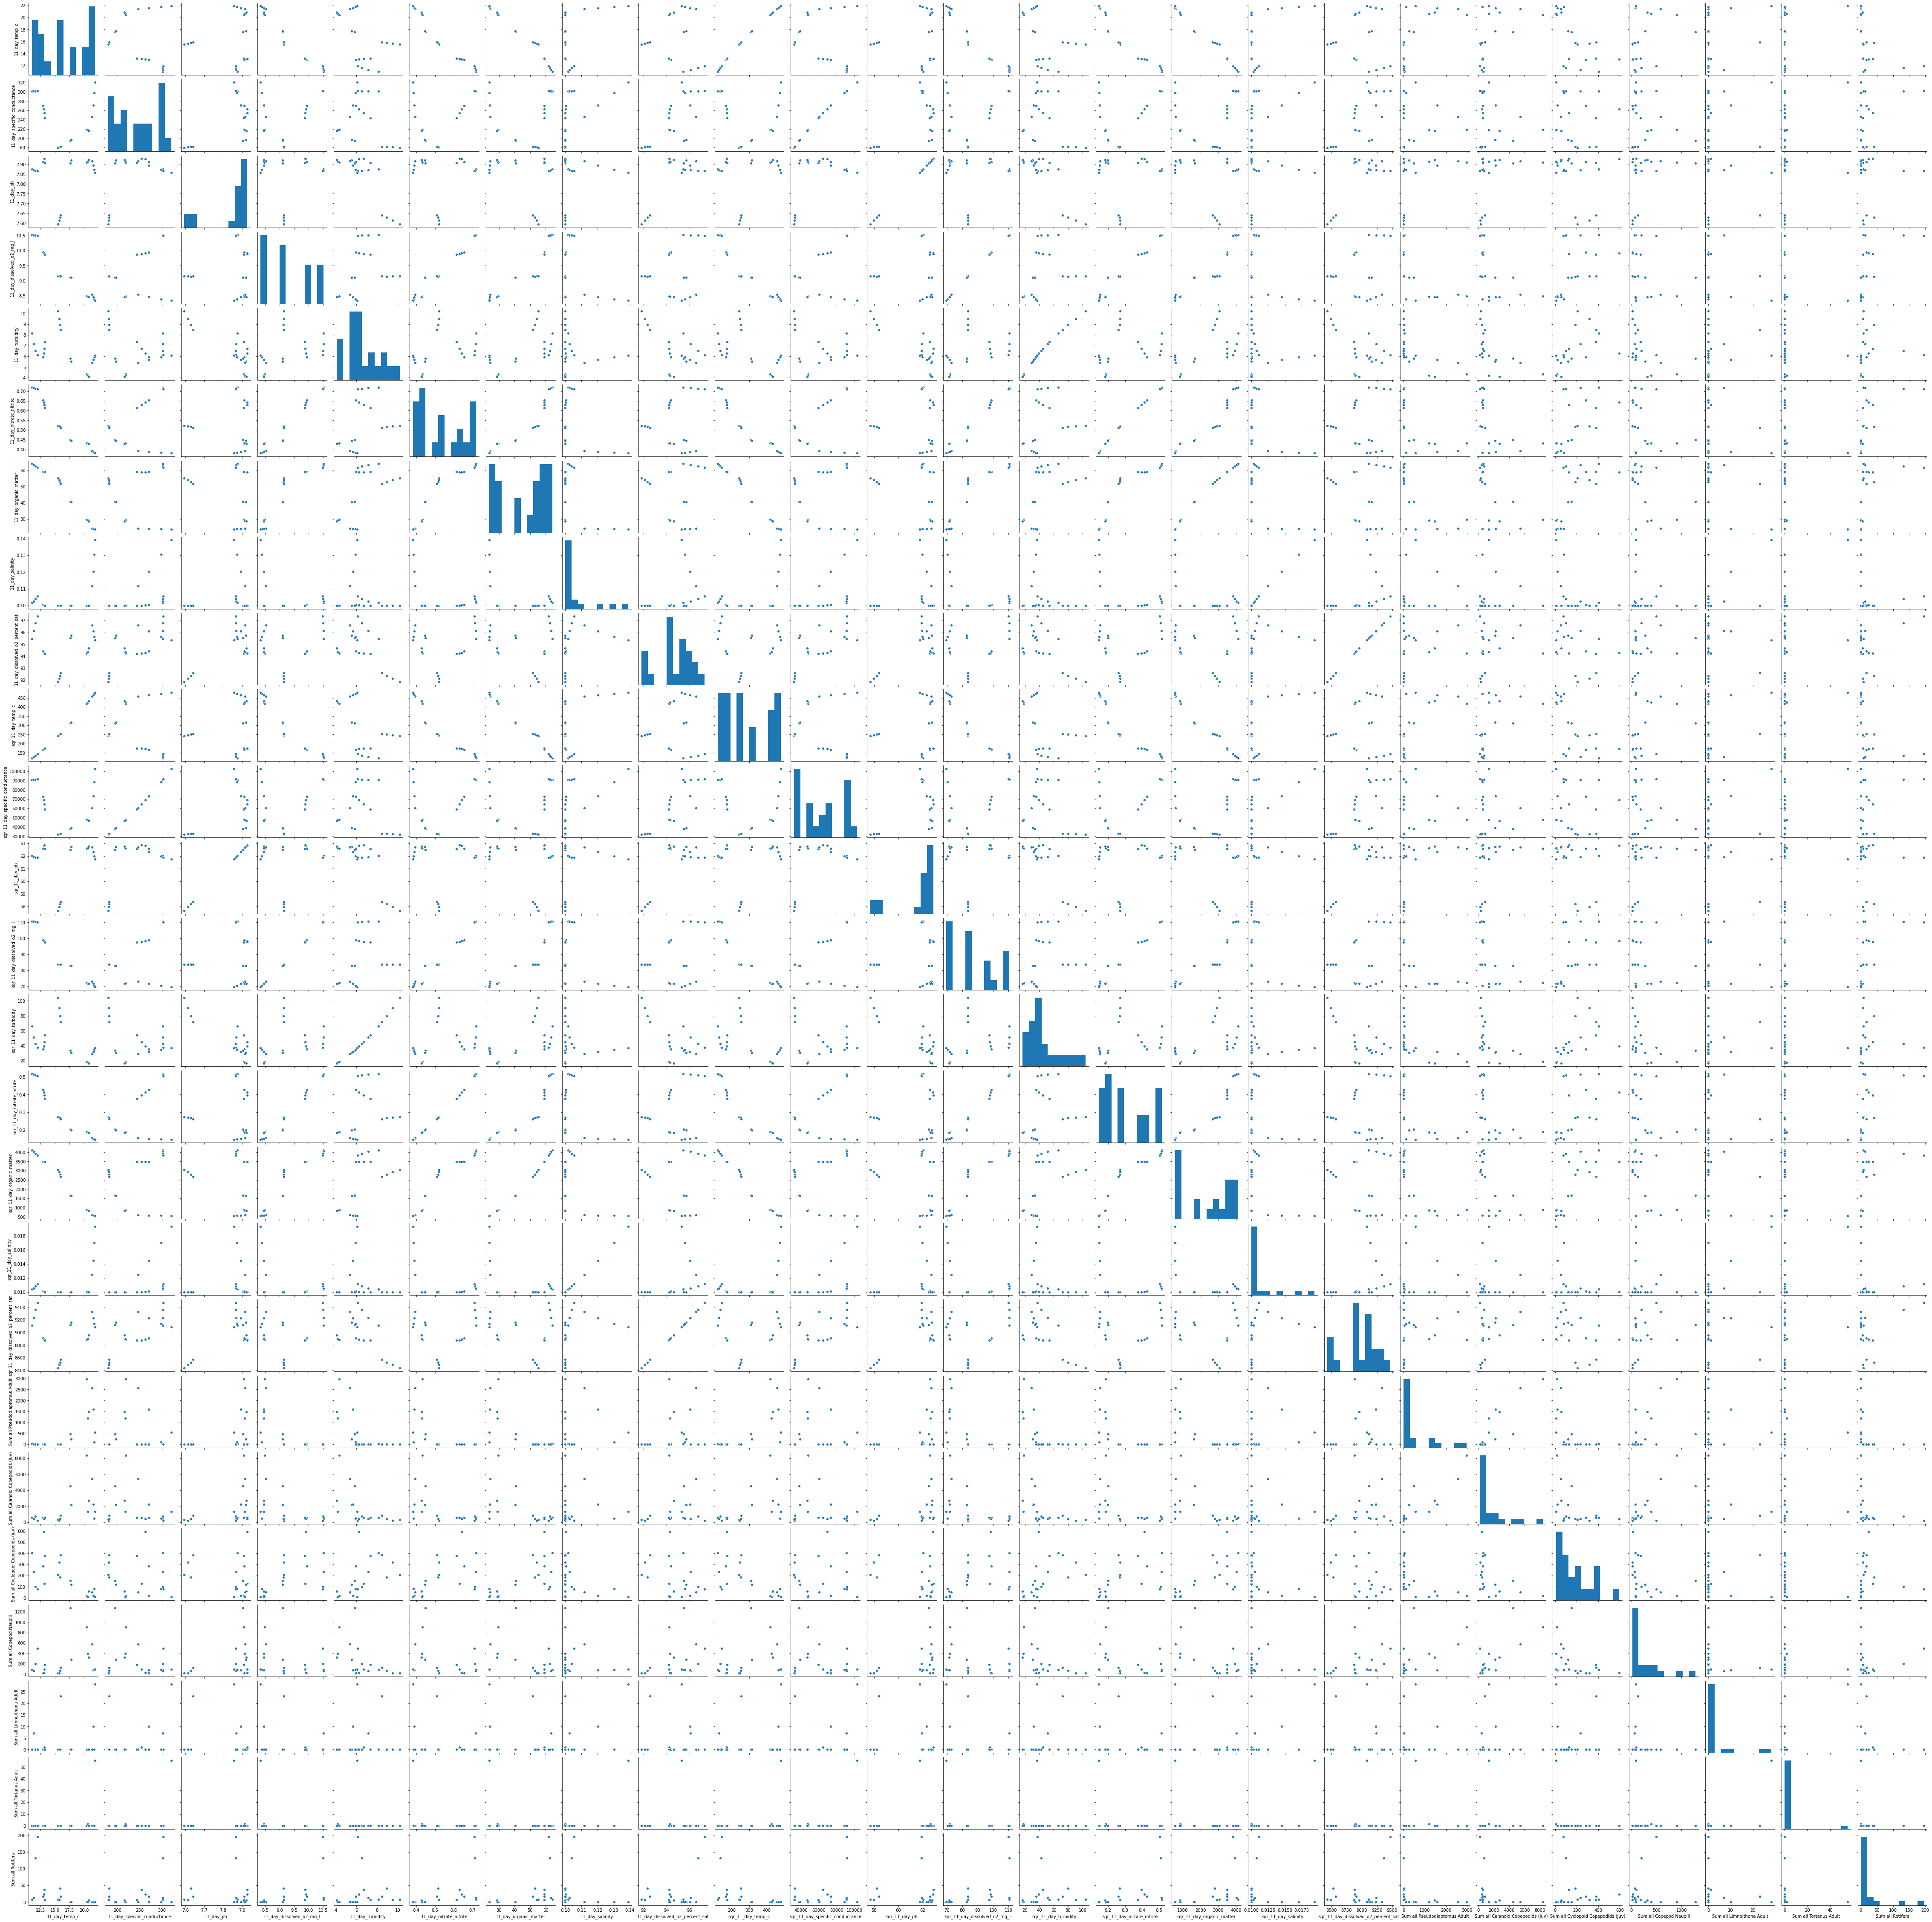

In [28]:
sns.pairplot(merged)

<AxesSubplot:>

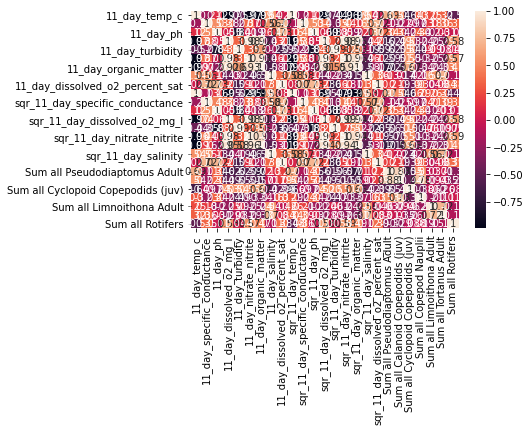

In [24]:
sns.heatmap(merged.corr(), annot = True)

<AxesSubplot:>

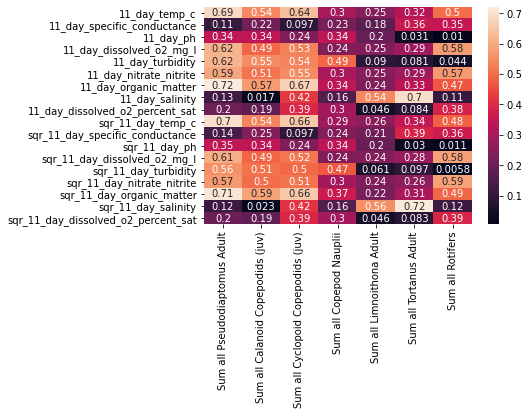

In [25]:
sns.heatmap(merged.corr().abs().iloc[:-7,-7:], annot = True)

In [26]:
correllations = merged.corr().abs().iloc[:-7,-7:]
correllations['sum'] = correllations.sum(axis=1)
correllations.head(30)

,Sum all Pseudodiaptomus Adult,Sum all Calanoid Copepodids (juv),Sum all Cyclopoid Copepodids (juv),Sum all Copepod Nauplii,Sum all Limnoithona Adult,Sum all Tortanus Adult,Sum all Rotifers,sum
11_day_temp_c,0.685571,0.542045,0.638243,0.300102,0.247709,0.324469,0.500239,3.238379
11_day_specific_conductance,0.106704,0.218931,0.097218,0.225627,0.176764,0.355325,0.351020,1.531590
11_day_ph,0.344630,0.341091,0.240069,0.338507,0.198150,0.030955,0.009991,1.503393
11_day_dissolved_o2_mg_l,0.619408,0.492261,0.532120,0.239296,0.245501,0.288247,0.576421,2.993254
11_day_turbidity,0.618846,0.552755,0.537525,0.493449,0.089663,0.080764,0.043848,2.416851
11_day_nitrate_nitrite,0.593705,0.512665,0.547770,0.302204,0.249096,0.285883,0.570881,3.062204
11_day_organic_matter,0.720791,0.574404,0.671645,0.336406,0.235624,0.333579,0.467966,3.340415
11_day_salinity,0.129074,0.017187,0.422927,0.159977,0.542691,0.696782,0.108584,2.077222
11_day_dissolved_o2_percent_sat,0.204154,0.188226,0.391496,0.295884,0.045868,0.084193,0.384537,1.594359
sqr_11_day_temp_c,0.697910,0.538087,0.655747,0.287329,0.256768,0.344822,0.482919,3.263582


## Notes
- looking at the above data having dissolved O2 as a mg/l instead of %sat shows a better correllation
- ditch turbidity

In [29]:
import pickle
pickle.dump(merged, open( "merged_df.p", "wb" ))